## Importing the libraries

In [9]:
#Primary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Preprocessing Libraries
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score, train_test_split
from imblearn.over_sampling import SMOTE

#Machine Learning Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier

#Evaluation Metrics
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report



## Importing the dataset

In [10]:
churn=pd.read_csv('churn.csv')
churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Check for basic information

In [11]:
def dataoveriew(data, message):
    print(f'{message}:\n')
    print('Number of rows: ', data.shape[0])
    print("\nNumber of features:", data.shape[1])
    print("\nData Features:")
    print(churn.columns.tolist())
dataoveriew(churn,'overview of churn data')

overview of churn data:

Number of rows:  7043

Number of features: 21

Data Features:
['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']


In [12]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [13]:
churn.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


### Inference:

From this its inferred that telecom customers are staying on average for 32 months and are paying $64 per month

## Data Cleaning and Preprocessing

#### Dropping the uniqe customer id column since it does not contribute to the model

In [14]:
cp=churn.drop(columns=["customerID"],axis=1)

In [15]:
cp.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [16]:
cp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


#### Convering the data types for total charges 


#### 11 rows in Total charges are blank and here we are replacing blanks with Na to handle missing values

In [17]:
for col in cp.columns:
  if cp[col].dtype == 'object':
    count = 0
    count = [count+1 for x in cp[col] if x == ' ']
    print(col + ' ' + str(sum(count)))

gender 0
Partner 0
Dependents 0
PhoneService 0
MultipleLines 0
InternetService 0
OnlineSecurity 0
OnlineBackup 0
DeviceProtection 0
TechSupport 0
StreamingTV 0
StreamingMovies 0
Contract 0
PaperlessBilling 0
PaymentMethod 0
TotalCharges 11
Churn 0


In [18]:
cols_new = ['TotalCharges']
for column in cols_new:
  cp.loc[cp[column] == ' ', column] = np.nan

In [19]:
cp.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

#### Changing the data type of the columns of TotalCharges to handle missing values


In [20]:
cp['TotalCharges'] = pd.to_numeric(cp['TotalCharges'],errors='coerce')
cp['TotalCharges'] = cp['TotalCharges'].astype("float")

In [21]:
cp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [22]:
cp.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

#### Checking outlier to understand by which means to handle the missing data

<AxesSubplot:xlabel='TotalCharges'>

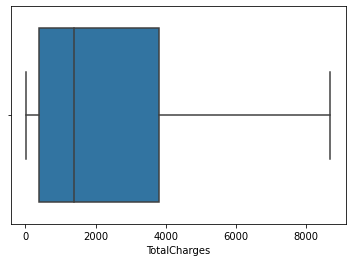

In [23]:
sns.boxplot(x='TotalCharges',data=cp)

#### Since there are no outliers in the TotalCharges column hereby, using mean to fill the missing values

In [24]:
cp["TotalCharges"].fillna(cp["TotalCharges"].mean(), inplace=True)

In [25]:
cp.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

#### Inference:

from above cell its been clear that missing values are treated

#### Splitting the data set into IDV_numerical,IDV_categorical and DV

In [26]:
IDV_NUM=cp[['tenure','MonthlyCharges','TotalCharges']]
IDV_NUM.head()

,tenure,MonthlyCharges,TotalCharges
0,1,29.85,29.85
1,34,56.95,1889.50
2,2,53.85,108.15
3,45,42.30,1840.75
4,2,70.70,151.65


In [27]:
cp.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [28]:
IDV_CAT=cp[["gender","SeniorCitizen","Partner","Dependents","PhoneService","MultipleLines","InternetService","OnlineSecurity","OnlineBackup","DeviceProtection","TechSupport","StreamingTV","StreamingMovies","Contract","PaperlessBilling","PaymentMethod"]]
IDV_CAT.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic)
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check


In [29]:
DV=cp['Churn']
DV.head()


0     No
1     No
2    Yes
3     No
4    Yes
Name: Churn, dtype: object

#### Checking if there are outliers in Numerical variables:

E:\Anaconda\envs\Project\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


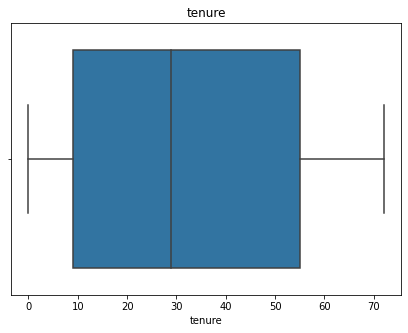

E:\Anaconda\envs\Project\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


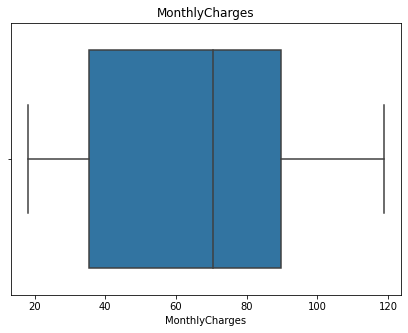

E:\Anaconda\envs\Project\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


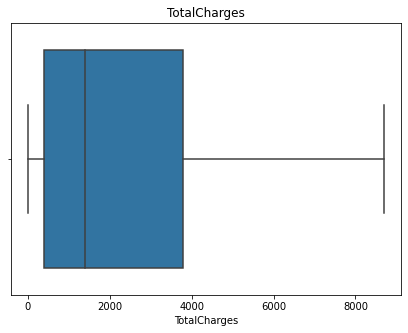

In [30]:
#boxplot
for i in IDV_NUM.columns:
    plt.figure(figsize=(7,5))
    sns.boxplot(IDV_NUM[i])
    plt.title(i)
    plt.show()

#### New dataframe after handling missing values and outliers -df

In [31]:
df=pd.concat([IDV_CAT,IDV_NUM,DV],axis=1)
df.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,tenure,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,1,29.85,29.85,No
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,34,56.95,1889.50,No
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,2,53.85,108.15,Yes
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),45,42.30,1840.75,No
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,2,70.70,151.65,Yes


## Exploratory Data Analysis

#### Note: 
    *) There are 17 categorical variables in the dataset.
    *) There are 3 Numerical variables in the dataset.

*) The 19  variable are categorized into 3 groups:

    Demographic customer information:
                                    gender , SeniorCitizen , Partner , Dependents

    Services that each customer has signed up for:
                                    PhoneService , MultipleLines , InternetService , OnlineSecurity , OnlineBackup , DeviceProtection , TechSupport , StreamingTV , StreamingMovies
    
    Customer account information:
                                    tenure , Contract , PaperlessBilling , PaymentMethod , MonthlyCharges , TotalCharge

### Analysis on target dependent variable- Churn

In [32]:
target = DV.value_counts()
target = target.reset_index()
target = target.rename(columns={'index': 'Category'})
target

,Category,Churn
0,No,5174
1,Yes,1869


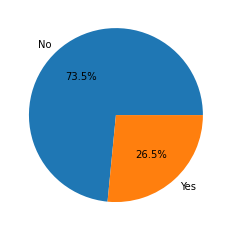

In [33]:
DV_fig=plt.pie(target['Churn'],labels=target["Category"],autopct='%1.1f%%')

#### Inference:

    This above pie chart helps us to understand the churn rate of the customers. which is provided interms of percentage as shown in the pie chart. 

### Analysis of categorical variables

#### Demographic customer information:

#### Gender and Senior Citizen

Male      0.504756
Female    0.495244
Name: gender, dtype: float64
0    0.837853
1    0.162147
Name: SeniorCitizen, dtype: float64


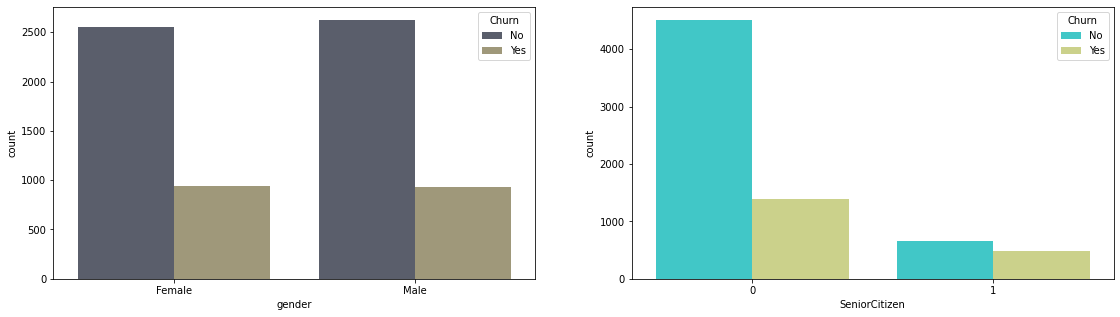

In [34]:
B1a=df['gender'].value_counts(normalize=True)
print(B1a)

B2a=df['SeniorCitizen'].value_counts(normalize=True)
print(B2a)


fig, g = plt.subplots(1, 2, figsize=(19,5))


B1a=sns.countplot(x='gender',data=df,ax=g[0],hue='Churn',palette='cividis')

B2a=sns.countplot(x='SeniorCitizen',data=df,hue='Churn',ax=g[1],palette='rainbow')



#### Inference:
Gender:
from above plot we can understand out of 50% and 49% of male and female respectively how many are tending to churn and not churn

Senior Citzen:
from above plot we can understand out of 83.7% and 16.2% of Non senior Citizen and Seniro Citizen respectively how many are tending to churn and not churn.

#### Partners and Dependents

No     0.516967
Yes    0.483033
Name: Partner, dtype: float64
No     0.700412
Yes    0.299588
Name: Dependents, dtype: float64


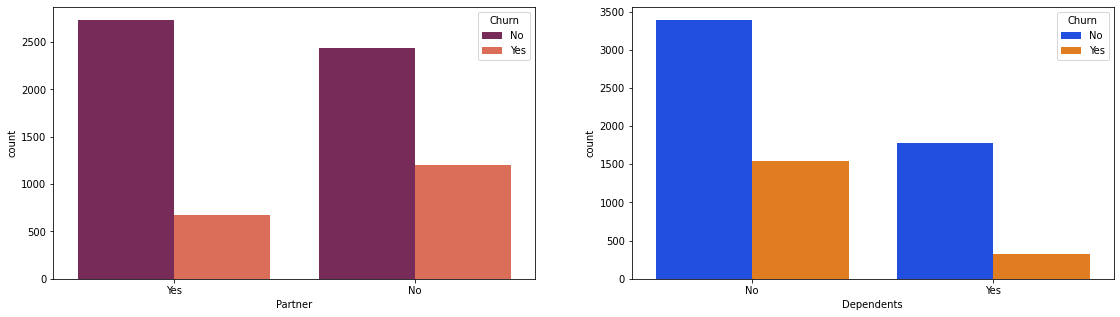

In [35]:
B3a=df['Partner'].value_counts(normalize=True)
print(B3a)

B4a=df['Dependents'].value_counts(normalize=True)
print(B4a)


fig, g = plt.subplots(1, 2, figsize=(19,5))


B3a=sns.countplot(x='Partner',data=df,hue='Churn',ax=g[0],palette="rocket")

B4a=sns.countplot(x='Dependents',data=df,hue='Churn',ax=g[1],palette='bright')

#### Inference:
Partner:
from above plot we can understand out of 51.6% and 48.3% of customers not having partners and customers having partners respectively how many are tending to churn and not churn

Dependents:
from above plot we can understand out of 70.7% and 30% of customers who are not having any dependents and customers who are having any dependents respectively how many are tending to churn and not churn.


#### Overall Inference on Demographical section:

    Gender and partner are evenly distributed with approximate percentage values. The difference in churn is slightly higher in females, but the small difference can be ignored. There’s a higher proportion of churn in younger customers (SeniorCitizen = No), customers with no partners, and customers with no dependents. The demographic section of data highlights on-senior citizens with no partners and dependents as a particular segment of customers likely to churn.

#### Analysis on Services that each customer has signed up for:


#### PhoneService and MultipleLines

Yes    0.903166
No     0.096834
Name: PhoneService, dtype: float64
No                  0.481329
Yes                 0.421837
No phone service    0.096834
Name: MultipleLines, dtype: float64


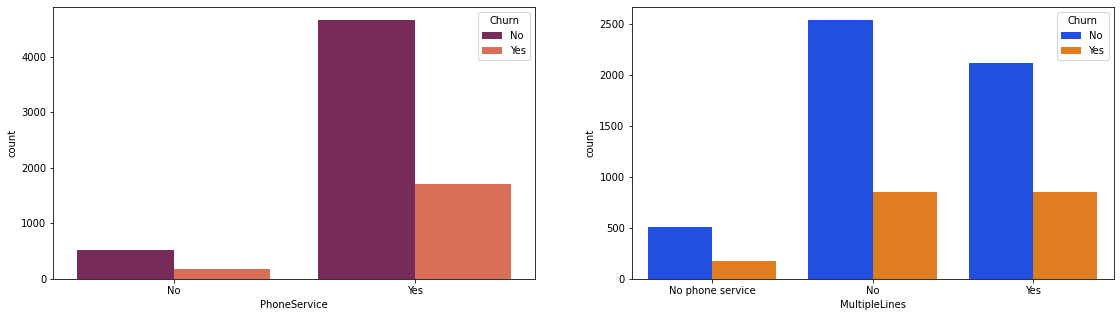

In [36]:
B1b=df['PhoneService'].value_counts(normalize=True)
print(B1b)

B2b=df['MultipleLines'].value_counts(normalize=True)
print(B2b)


fig, g = plt.subplots(1, 2, figsize=(19,5))


B1b=sns.countplot(x='PhoneService',data=df,hue='Churn',ax=g[0],palette="rocket")

B2b=sns.countplot(x='MultipleLines',data=df,hue='Churn',ax=g[1],palette='bright')

#### Inference:
Phone Service:
from above plot we can understand out of 10% and 90% of customers not having phone service and customers having phone Service respectively how many are tending to churn and not churn

Multiple Lines:
from above plot we can understand out of 48%, 42% and 10% of customers who are not having multiple Lines, having multiple lines and customers who are not having phone Service respectively how many are tending to churn and not churn.

#### Internet Service and Online Security

Fiber optic    0.439585
DSL            0.343746
No             0.216669
Name: InternetService, dtype: float64
No                     0.496663
Yes                    0.286668
No internet service    0.216669
Name: OnlineSecurity, dtype: float64


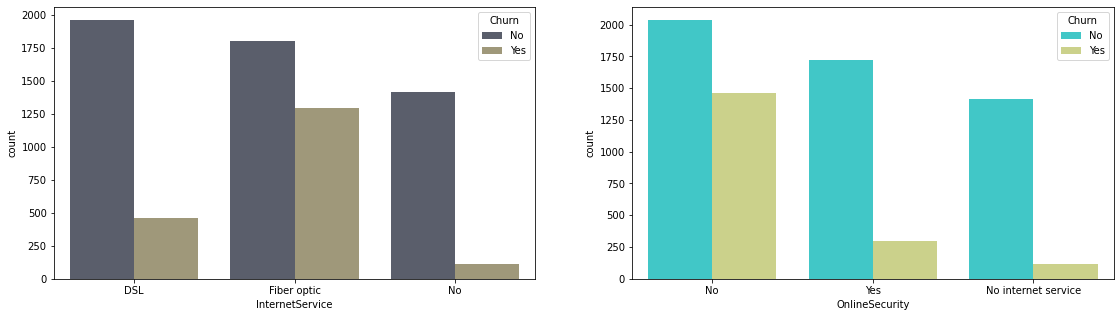

In [37]:
B3b=df['InternetService'].value_counts(normalize=True)
print(B3b)

B4b=df['OnlineSecurity'].value_counts(normalize=True)
print(B4b)


fig, g = plt.subplots(1, 2, figsize=(19,5))


B3b=sns.countplot(x='InternetService',data=df,ax=g[0],hue='Churn',palette='cividis')

B4b=sns.countplot(x='OnlineSecurity',data=df,hue='Churn',ax=g[1],palette='rainbow')



#### Inference:
Internet Service:
from above plot we can understand out of 44%,34% and 22% of customers having fibre optic, DSL customers not having Internet Service respectively how many are tending to churn and not churn

Online Security :
from above plot we can understand out of 50%, 29% and 21% of customers who are not having Online Security, having Online Security and customers who are not having Internet Service respectively how many are tending to churn and not churn.

#### OnlineBackup and DeviceProtection

No                     0.438450
Yes                    0.344881
No internet service    0.216669
Name: OnlineBackup, dtype: float64
No                     0.439443
Yes                    0.343888
No internet service    0.216669
Name: DeviceProtection, dtype: float64


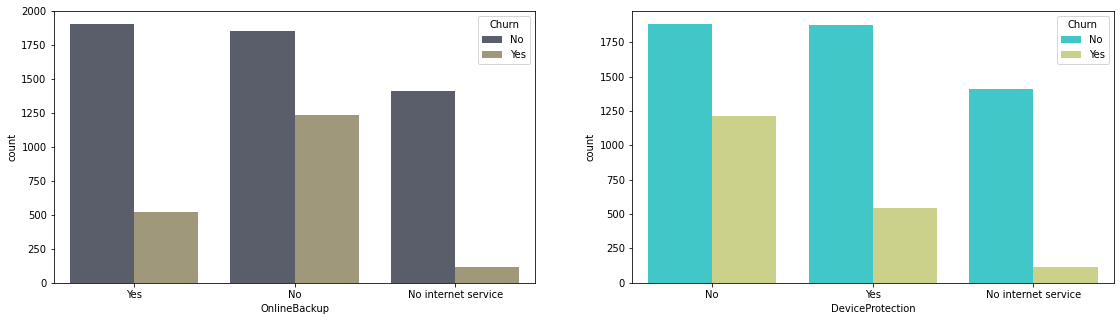

In [38]:
B5b=df['OnlineBackup'].value_counts(normalize=True)
print(B5b)

B6b=df['DeviceProtection'].value_counts(normalize=True)
print(B6b)

fig, g = plt.subplots(1, 2, figsize=(19,5))


B5b=sns.countplot(x='OnlineBackup',data=df,ax=g[0],hue='Churn',palette='cividis')

B6b=sns.countplot(x='DeviceProtection',data=df,hue='Churn',ax=g[1],palette='rainbow')



#### Inference:
Online Backup:
from above plot we can understand out of 44%,34% and 22% of customers not having Online Backup, customers having Online Backup and customers who are not having Internet Service respectively how many are tending to churn and not churn

Online Security :
from above plot we can understand out of 43.9%,34.5% and 21.7% of customers who are not having  Device Protection, having Device Protection and customers who are not having Internet Service respectively how many are tending to churn and not churn.

#### Techsupport and StreamingTv

No                     0.493114
Yes                    0.290217
No internet service    0.216669
Name: TechSupport, dtype: float64
No                     0.398978
Yes                    0.384353
No internet service    0.216669
Name: StreamingTV, dtype: float64


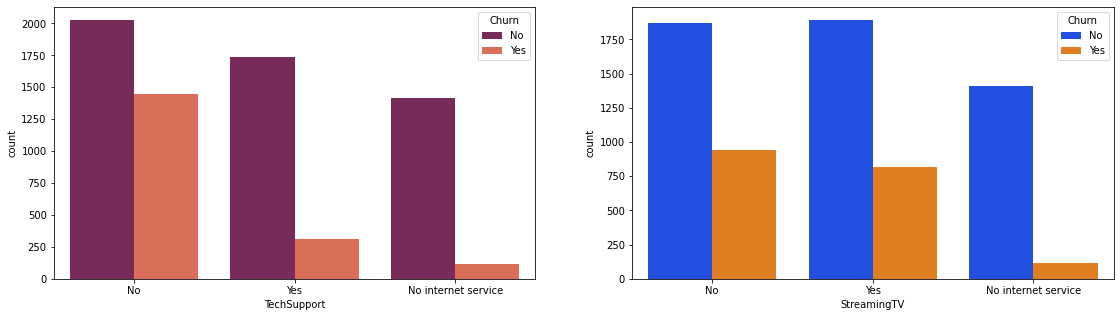

In [39]:
B7b=df['TechSupport'].value_counts(normalize=True)
print(B7b)

B8b=df['StreamingTV'].value_counts(normalize=True)
print(B8b)


fig, g = plt.subplots(1, 2, figsize=(19,5))


B7b=sns.countplot(x='TechSupport',data=df,hue='Churn',ax=g[0],palette="rocket")

B8b=sns.countplot(x='StreamingTV',data=df,hue='Churn',ax=g[1],palette='bright')

#### Inference:
TechSupport::
from above plot we can understand out of 50%,30% and 20% of customers not having TechSupport, customers having TechSupport and customers who are not having Internet Service respectively how many are tending to churn and not churn

StreamingTV :
from above plot we can understand out of 40%,38.5% and 21.5% of customers who are not having  StreamingTV, having StreamingTV and customers who are not having Internet Service respectively how many are tending to churn and not churn.

#### StreamingMovies 

No                     0.395428
Yes                    0.387903
No internet service    0.216669
Name: StreamingMovies, dtype: float64


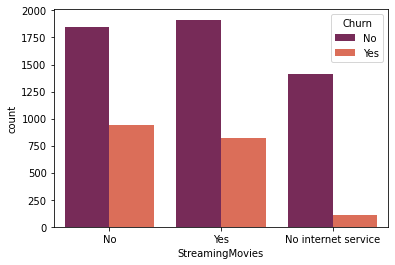

In [40]:
B9b=df['StreamingMovies'].value_counts(normalize=True)
print(B9b)

B9b=sns.countplot(x='StreamingMovies',data=df,hue='Churn',palette="rocket")




#### Inference:
StreamingMovies::
from above plot we can understand out of 39.5%,39% and 21.5% of customers not StreamingMovies, customers StreamingMovies and customers who are not having Internet Service respectively how many are tending to churn and not churn



#### Overall Inference for Services that each customer has signed up for:

    These features show significant variations across their values. If a customer doesn’t have phone service, they can’t have multiple lines. About 90.3% of the customers have phone services and have a higher rate to churn. Customers who have fibre optic as an internet service are more likely to churn. This can happen due to high prices, competition, customer service, and many other reasons. Fiber optic service is much more expensive than DSL, which may be one of the reasons why customers churn. Customers with  OnlineSecurity, OnlineBackup, DeviceProtection, and TechSupport are more unlikely to churn. Streaming service is not predictive for churn as it’s evenly distributed to yes and no options.

#### Analysis on Customer Account information:


Month-to-month    0.550192
Two year          0.240664
One year          0.209144
Name: Contract, dtype: float64


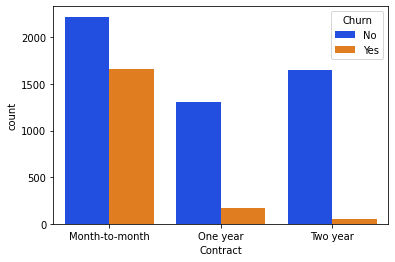

In [41]:
B1c=df['Contract'].value_counts(normalize=True)
print(B1c)

B1c=sns.countplot(x='Contract',data=df,hue='Churn',palette='bright')

#### Inference:
Contract :
from above plot we can understand out of 55%,24% and 21% of customers who are not having  Contract, having Contract and customers who are not having Internet Service respectively how many are tending to churn and not churn.

#### PaperlessBilling and PaymentMethod

Yes    0.592219
No     0.407781
Name: PaperlessBilling, dtype: float64
Electronic check             0.335794
Mailed check                 0.228880
Bank transfer (automatic)    0.219225
Credit card (automatic)      0.216101
Name: PaymentMethod, dtype: float64


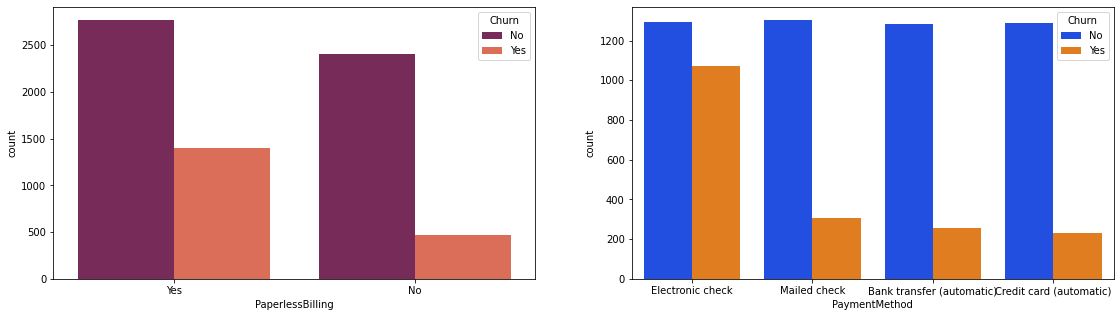

In [42]:
B11b=df['PaperlessBilling'].value_counts(normalize=True)
print(B11b)

B12b=df['PaymentMethod'].value_counts(normalize=True)
print(B12b)

fig, g = plt.subplots(1, 2, figsize=(19,5))


B11b=sns.countplot(x='PaperlessBilling',data=df,hue='Churn',ax=g[0],palette="rocket")

B12b=sns.countplot(x='PaymentMethod',data=df,hue='Churn',ax=g[1],palette='bright')

#### Inference:
PaperlessBilling::
from above plot we can understand out of 60% and 40% of customers who do paperless billing and customers who dont do PaperlessBilling respectively how many are tending to churn and not churn

Contract :
from above plot we can understand out of 33%,23%,22% and 21% of customers who use electronic check, Mailed check, Bank transfer and Credit card as their Payment Method respectively how many are tending to churn and not churn.

#### Overall inference on Customer Account information:
    The shorter the contract, the higher the churn rate. Those with more extended plans face additional barriers when canceling early. This clearly explains the motivation for companies to have long-term relationships with their customers. Churn Rate is higher for the customers who opted for paperless billing. About 59.2% of customers use paperless billing. Customers who pay with electronic checks are more likely to churn, and this kind of payment is more common than other payment types.

#### Analysis on Numerical variable

#### tenure

<AxesSubplot:xlabel='tenure', ylabel='Churn'>

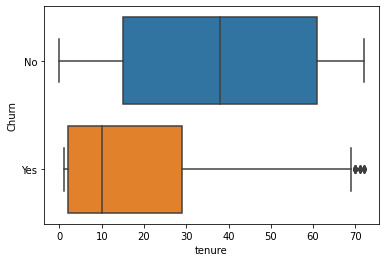

In [43]:
sns.boxplot(x='tenure',y='Churn',data=df)

#### Inference:
The tenure boxplot is inferred and shows that most customers have been with the telecom company for just the first few months (0-9 months). The highest rate of churn is also in the first few months (0-9months). most of customers who end up leaving the Telco company do so within their first 30 months.

#### Monthly Charges

<AxesSubplot:xlabel='MonthlyCharges', ylabel='Churn'>

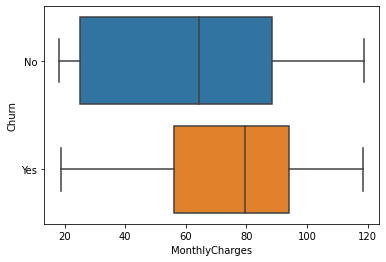

In [44]:
sns.boxplot(x='MonthlyCharges',y='Churn',data=df)

#### Inference:
The monthly charge plot shows that clients with higher monthly charges have a higher churn rate. This suggests that discounts and promotions can be an enticing reason for customers to stay.


## Checking Multicollinearity using vif and removing variable.

In [45]:
! pip install statsmodels

In [46]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [47]:
for i in range(len(IDV_NUM.columns)):
    print(f'{IDV_NUM.columns[i]}********(=){variance_inflation_factor(IDV_NUM.values,i)}')

tenure********(=)6.306042369399735
MonthlyCharges********(=)3.361520001836481
TotalCharges********(=)8.055642863609867


## Encoding the variables

In [48]:
df_new=df.copy()
df_new.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,tenure,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,1,29.85,29.85,No
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,34,56.95,1889.50,No
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,2,53.85,108.15,Yes
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),45,42.30,1840.75,No
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,2,70.70,151.65,Yes


In [49]:
df_new_IDV=df_new.iloc[:,:-1]
df_new_IDV.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,tenure,MonthlyCharges,TotalCharges
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,1,29.85,29.85
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,34,56.95,1889.50
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,2,53.85,108.15
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),45,42.30,1840.75
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,2,70.70,151.65


In [50]:
df_l=df_new.iloc[:,-1]
df_new_dv=pd.DataFrame(df_l)


In [51]:
df_new_dv.head()

,Churn
0,No
1,No
2,Yes
3,No
4,Yes


####  Note:

    df_new_dv_2 = refers the encoded part of DV

    df_new_IDV_1= encoded part of categories

    df_new_IDV_2 = remaining columns from numericalm

In [52]:
df_new_dv_2=df_new_dv.copy()
df_new_dv_2.head()

,Churn
0,No
1,No
2,Yes
3,No
4,Yes


In [53]:
df_new_dv_2.replace({'Churn':{'No':0,'Yes':1}},inplace=True)
df_new_dv_2.head()

,Churn
0,0
1,0
2,1
3,0
4,1


In [54]:
df_new_IDV.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'tenure',
       'MonthlyCharges', 'TotalCharges'],
      dtype='object')

In [55]:
df_new_IDV_1=df_new_IDV[['gender','Partner', 'Dependents', 'PhoneService', 'PaperlessBilling','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaymentMethod']]
df_new_IDV_1.head()

,gender,Partner,Dependents,PhoneService,PaperlessBilling,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaymentMethod
0,Female,Yes,No,No,Yes,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Electronic check
1,Male,No,No,Yes,No,No,DSL,Yes,No,Yes,No,No,No,One year,Mailed check
2,Male,No,No,Yes,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Mailed check
3,Male,No,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,Bank transfer (automatic)
4,Female,No,No,Yes,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Electronic check


In [56]:
df_new_IDV_2=df_new_IDV[['SeniorCitizen','tenure','MonthlyCharges','TotalCharges']]
df_new_IDV_2.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,0,1,29.85,29.85
1,0,34,56.95,1889.50
2,0,2,53.85,108.15
3,0,45,42.30,1840.75
4,0,2,70.70,151.65


#### Classified Weight approach

In [57]:
for col in df_new_IDV_1.columns:
    print(df_new_IDV_1[col].value_counts())


Male      3555
Female    3488
Name: gender, dtype: int64
No     3641
Yes    3402
Name: Partner, dtype: int64
No     4933
Yes    2110
Name: Dependents, dtype: int64
Yes    6361
No      682
Name: PhoneService, dtype: int64
Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64
No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64
Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64
No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64
No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64
No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64
No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64
No                     2810
Yes         

In [58]:
df_new_IDV_1.columns

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaymentMethod'],
      dtype='object')

In [59]:
df_new_IDV_1.replace({'gender':{'Male':0,'Female':1}},inplace=True)
df_new_IDV_1.replace({'Partner':{'No':0,'Yes':1}},inplace=True)
df_new_IDV_1.replace({'Dependents':{'No':0,'Yes':1}},inplace=True)
df_new_IDV_1.replace({'PhoneService':{'Yes':0,'No':1}},inplace=True)
df_new_IDV_1.replace({'PaperlessBilling':{'Yes':0,'No':1}},inplace=True)
df_new_IDV_1.replace({'MultipleLines':{'No':0,'Yes':1,'No phone service':2}},inplace=True)
df_new_IDV_1.replace({'InternetService':{'Fiber optic':0,'DSL':1,'No':2}},inplace=True)
df_new_IDV_1.replace({'OnlineSecurity':{'No':0,'Yes':1,'No internet service':2}},inplace=True)
df_new_IDV_1.replace({'OnlineBackup':{'No':0,'Yes':1,'No internet service':2}},inplace=True)
df_new_IDV_1.replace({'DeviceProtection':{'No':0,'Yes':1,'No internet service':2}},inplace=True)
df_new_IDV_1.replace({'TechSupport':{'No':0,'Yes':1,'No internet service':2}},inplace=True)
df_new_IDV_1.replace({'StreamingTV':{'No':0,'Yes':1,'No internet service':2}},inplace=True)
df_new_IDV_1.replace({'StreamingMovies':{'No':0,'Yes':1,'No internet service':2}},inplace=True)
df_new_IDV_1.replace({'Contract':{'Month-to-month':0,'Two year':1,'One year':2}},inplace=True)
df_new_IDV_1.replace({'PaymentMethod':{'Electronic check':0,'Mailed check':1,'Bank transfer (automatic)':2,'Credit card (automatic)':3}},inplace=True)







C:\Users\ARAVINDKUMAR R\AppData\Local\Temp\ipykernel_20708\3379302246.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new_IDV_1.replace({'gender':{'Male':0,'Female':1}},inplace=True)
C:\Users\ARAVINDKUMAR R\AppData\Local\Temp\ipykernel_20708\3379302246.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new_IDV_1.replace({'Partner':{'No':0,'Yes':1}},inplace=True)
C:\Users\ARAVINDKUMAR R\AppData\Local\Temp\ipykernel_20708\3379302246.py:3: SettingWithCopyWarning: 
A value is trying to be set on a co

In [60]:
df_new_IDV_1.head()

,gender,Partner,Dependents,PhoneService,PaperlessBilling,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaymentMethod
0,1,1,0,1,0,2,1,0,1,0,0,0,0,0,0
1,0,0,0,0,1,0,1,1,0,1,0,0,0,2,1
2,0,0,0,0,0,0,1,1,1,0,0,0,0,0,1
3,0,0,0,1,1,2,1,1,0,1,1,0,0,2,2
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


#### Data is the encoded new dataset to be refered

In [61]:
data=pd.concat([df_new_IDV_1,df_new_IDV_2,df_new_dv_2],axis=1)
data.head()

,gender,Partner,Dependents,PhoneService,PaperlessBilling,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaymentMethod,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn
0,1,1,0,1,0,2,1,0,1,0,0,0,0,0,0,0,1,29.85,29.85,0
1,0,0,0,0,1,0,1,1,0,1,0,0,0,2,1,0,34,56.95,1889.50,0
2,0,0,0,0,0,0,1,1,1,0,0,0,0,0,1,0,2,53.85,108.15,1
3,0,0,0,1,1,2,1,1,0,1,1,0,0,2,2,0,45,42.30,1840.75,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,70.70,151.65,1


In [62]:
data.shape

(7043, 20)

In [63]:
x=data.iloc[:,:-1]
x.head()

,gender,Partner,Dependents,PhoneService,PaperlessBilling,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaymentMethod,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,1,1,0,1,0,2,1,0,1,0,0,0,0,0,0,0,1,29.85,29.85
1,0,0,0,0,1,0,1,1,0,1,0,0,0,2,1,0,34,56.95,1889.50
2,0,0,0,0,0,0,1,1,1,0,0,0,0,0,1,0,2,53.85,108.15
3,0,0,0,1,1,2,1,1,0,1,1,0,0,2,2,0,45,42.30,1840.75
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,70.70,151.65


In [64]:
x.shape

(7043, 19)

In [65]:
y=data.iloc[:,-1]
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64

In [66]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)

In [67]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(5282, 19)
(1761, 19)
(5282,)
(1761,)


## Feature Scaling using Min Max scaler

In [68]:
from sklearn.preprocessing import MinMaxScaler
MMS=MinMaxScaler()

In [69]:
x_train=MMS.fit_transform(x_train)
x_test=MMS.transform(x_test)

## Checking prevalance rate

In [70]:
print(x_train.shape)
print(y_train.shape)

(5282, 19)
(5282,)


In [71]:
Prevalance_rate_ytrain=y_train.value_counts()#(normalize=True).mul(100).round(1)
Prevalance_rate_ytrain


0    3876
1    1406
Name: Churn, dtype: int64

## Performing Over Sampling - SMOTE to balance the dataset

In [72]:
import imblearn

In [73]:
from imblearn.over_sampling import SMOTE
smote=SMOTE()
x_smote,y_smote=smote.fit_resample(x_train,y_train)

In [74]:
print(x_smote.shape)  
print(y_smote.shape)

(7752, 19)
(7752,)


#### x1_train and y1_train are the oversampled data and are the new xtrain and ytrain values

In [75]:
x1_train=x_smote
y1_train=y_smote

## Model Building

In [76]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier

### Function to build the model

In [77]:
def modeling(alg, alg_name, params={}):
    model = alg(**params) 
    model.fit(x1_train, y1_train)
    ypred_train = model.predict(x1_train)
    ypred_test = model.predict(x_test)
    
    #Performance evaluation
    def print_scores(alg, y1_train, ypred_train,y_test,ypred_test):
        print(alg_name) 
        
        print("-----------------Accuracy Score of Train and Test------------------------------------------")

        acc_score = accuracy_score(y1_train, ypred_train)
        print("accuracy for train: ",acc_score)

        acc_score1=accuracy_score(y_test, ypred_test)
        print("accuracy for test: ",acc_score1)

        cv_score = cross_val_score(model, x1_train, y1_train, cv=5)
        print(f"cross validation mean score for train: {cv_score.mean()}")

        print("-----------------Train Metrics------------------------------------------")

        conf_mat=confusion_matrix(y1_train, ypred_train)
        print("confusion matrix for train: \n",conf_mat)
        
        clas_rep=classification_report(y1_train, ypred_train)
        print("classification report for train: \n",clas_rep)



    print_scores(alg, y1_train, ypred_train,y_test,ypred_test)
    

    return model

### Logistic Regression

In [78]:
log_model = modeling(LogisticRegression, 'Logistic Regression')


Logistic Regression
-----------------Accuracy Score of Train and Test------------------------------------------
accuracy for train:  0.7774767801857585
accuracy for test:  0.7524134014764339
cross validation mean score for train: 0.7748966951602503
-----------------Train Metrics------------------------------------------
confusion matrix for train: 
 [[2963  913]
 [ 812 3064]]
classification report for train: 
               precision    recall  f1-score   support

           0       0.78      0.76      0.77      3876
           1       0.77      0.79      0.78      3876

    accuracy                           0.78      7752
   macro avg       0.78      0.78      0.78      7752
weighted avg       0.78      0.78      0.78      7752



### Random Forest

In [79]:
rf_model = modeling(RandomForestClassifier, "Random Forest Classification")


Random Forest Classification
-----------------Accuracy Score of Train and Test------------------------------------------
accuracy for train:  0.9981940144478845
accuracy for test:  0.7722884724588303
cross validation mean score for train: 0.8511540941328175
-----------------Train Metrics------------------------------------------
confusion matrix for train: 
 [[3865   11]
 [   3 3873]]
classification report for train: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3876
           1       1.00      1.00      1.00      3876

    accuracy                           1.00      7752
   macro avg       1.00      1.00      1.00      7752
weighted avg       1.00      1.00      1.00      7752



### Decision Tree

In [80]:
dt_model=modeling(DecisionTreeClassifier,"Decision Tree Classification")

Decision Tree Classification
-----------------Accuracy Score of Train and Test------------------------------------------
accuracy for train:  0.9981940144478845
accuracy for test:  0.7166382737081204
cross validation mean score for train: 0.791814230153283
-----------------Train Metrics------------------------------------------
confusion matrix for train: 
 [[3875    1]
 [  13 3863]]
classification report for train: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3876
           1       1.00      1.00      1.00      3876

    accuracy                           1.00      7752
   macro avg       1.00      1.00      1.00      7752
weighted avg       1.00      1.00      1.00      7752



## Naive Bayes

In [81]:
GNB_model=modeling(GaussianNB,"Gaussian Naive Bayes Classification")

Gaussian Naive Bayes Classification
-----------------Accuracy Score of Train and Test------------------------------------------
accuracy for train:  0.7576109391124871
accuracy for test:  0.704145371947757
cross validation mean score for train: 0.7572251825045236
-----------------Train Metrics------------------------------------------
confusion matrix for train: 
 [[2640 1236]
 [ 643 3233]]
classification report for train: 
               precision    recall  f1-score   support

           0       0.80      0.68      0.74      3876
           1       0.72      0.83      0.77      3876

    accuracy                           0.76      7752
   macro avg       0.76      0.76      0.76      7752
weighted avg       0.76      0.76      0.76      7752



### Boosting

In [82]:
Ada_Boost=modeling(AdaBoostClassifier,"Ada Boost Classification")

Ada Boost Classification
-----------------Accuracy Score of Train and Test------------------------------------------
accuracy for train:  0.8324303405572755
accuracy for test:  0.7632027257240205
cross validation mean score for train: 0.8236699735862401
-----------------Train Metrics------------------------------------------
confusion matrix for train: 
 [[3047  829]
 [ 470 3406]]
classification report for train: 
               precision    recall  f1-score   support

           0       0.87      0.79      0.82      3876
           1       0.80      0.88      0.84      3876

    accuracy                           0.83      7752
   macro avg       0.84      0.83      0.83      7752
weighted avg       0.84      0.83      0.83      7752



## Inference:

From above built models we can find that Ada boost Classifier gives us high accuracy of 82.5% and it is the best model for this problem.

## Hyper Tuning the Best Model

In [83]:
Ada_Boost_final=modeling(AdaBoostClassifier,"Ada Boost Classification",params={'n_estimators':400,'learning_rate':0.190})

Ada Boost Classification
-----------------Accuracy Score of Train and Test------------------------------------------
accuracy for train:  0.8360423116615067
accuracy for test:  0.7722884724588303
cross validation mean score for train: 0.8272819616896487
-----------------Train Metrics------------------------------------------
confusion matrix for train: 
 [[3100  776]
 [ 495 3381]]
classification report for train: 
               precision    recall  f1-score   support

           0       0.86      0.80      0.83      3876
           1       0.81      0.87      0.84      3876

    accuracy                           0.84      7752
   macro avg       0.84      0.84      0.84      7752
weighted avg       0.84      0.84      0.84      7752



In [84]:
#gsv=GridSearchCV(estimator=Ada_Boost,param_grid={'n_estimators':[50,100,150,200,250,300,350,400,450,500]},cv=5,scoring='accuracy',verbose=1)

In [85]:
#best_model.fit(x1_train,y1_train)

In [86]:
#best_model.best_params_

#### Saving the Best model

In [87]:
import pickle
import os

filename = 'AdaBoost_final.pkl'
path = os.getcwd()

pickle.dump(Ada_Boost_final, open(path+ f'\\{filename}', 'wb'))